In [23]:
import pickle
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

In [2]:
runs = Path().absolute()/'runs'

In [3]:
runs

PosixPath('/home/eric/Code/ai-experiments/effective-information/robustness/runs')

In [4]:
runs.exists()

True

In [10]:
folder = list(runs.glob('*'))[1]

In [11]:
folder

PosixPath('/home/eric/Code/ai-experiments/effective-information/robustness/runs/ecb4c5659c7eecf670dd738b05615f57432771c7')

In [19]:
with open(folder/'data.pkl', "rb") as f:
    params, data = pickle.load(f)

topology, bias, activation, initializer = params   
num_batches_data, eis_data, losses_data, accuracies_data = data
train_losses, test_losses = zip(*losses_data)

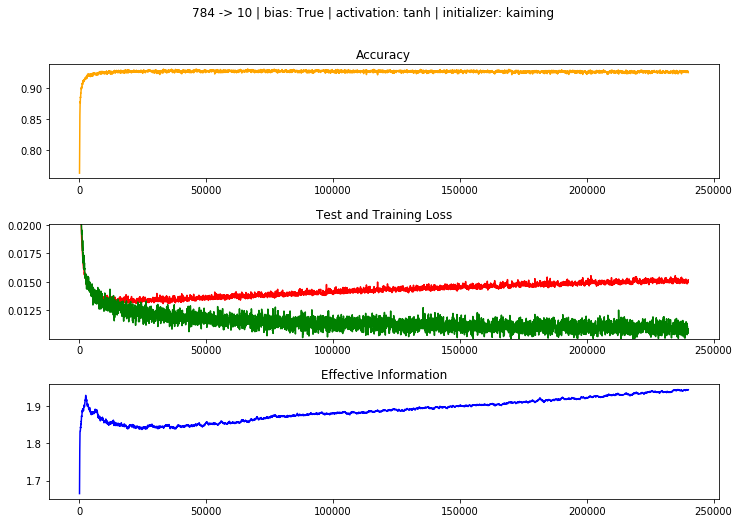

In [25]:
train_losses, test_losses = zip(*losses_data)
fig = plt.figure(figsize=(12, 8))
topology, bias, activation, initializer = params
plt.suptitle(f"{topology} | bias: {bias} | activation: {activation} | initializer: {initializer}")

plt.subplot(3, 1, 1)
plt.plot(num_batches_data, accuracies_data, color='orange')
plt.title("Accuracy")

plt.subplot(3, 1, 2)
plt.plot(num_batches_data, test_losses, color='red')
plt.plot(num_batches_data, train_losses, color='green')
yavg = np.mean(test_losses)
plt.ylim(yavg*0.7, yavg*1.4)
plt.title("Test and Training Loss")


plt.subplot(3, 1, 3)
plt.plot(num_batches_data, eis_data, color='blue')
plt.title("Effective Information")

plt.subplots_adjust(hspace=0.4)

# plt.savefig(f"plots/different-inits/{init}", dpi=300)
